# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from datetime import datetime, timedelta
from newsapi.newsapi_client import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
# Read your api key environment variable
load_dotenv()

news_api_key = os.getenv("NEWS_API_KEY")

print(type(news_api_key))

<class 'str'>


In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=news_api_key)

In [4]:
from_date = datetime.strptime("2020-12-01", "%Y-%m-%d")
to_date = datetime.strptime("2020-12-15", "%Y-%m-%d")

In [5]:
def get_content(keyword, from_date, to_date, pages=1):    
    all_content = []
    all_dates = []    
    date = to_date
    end_date = from_date - timedelta(days=1)
    
    print(f"Fetching news about '{keyword}'")
    print("*" * 30)
     
    while date > end_date:
        print(f"retrieving news from: {date}")
        articles = newsapi.get_everything(
            q=keyword,
            from_param=str(date),
            to=str(date),
            language="en",
            sort_by="relevancy",
            page=pages
        )
        
        contents = []
        
        for i in range(0, len(articles["articles"])):
            contents.append(articles["articles"][i]["content"])
            
        all_content += contents
        all_dates.append(date)
        date = date - timedelta(days=1)
    return all_content, all_dates

In [7]:
# Fetch the Bitcoin news articles
bitcoin_content, bitcoin_dates = get_content("bitcoin", from_date=from_date, to_date=to_date)

Fetching news about 'bitcoin'
******************************
retrieving news from: 2020-12-15 00:00:00
retrieving news from: 2020-12-14 00:00:00
retrieving news from: 2020-12-13 00:00:00
retrieving news from: 2020-12-12 00:00:00
retrieving news from: 2020-12-11 00:00:00
retrieving news from: 2020-12-10 00:00:00
retrieving news from: 2020-12-09 00:00:00
retrieving news from: 2020-12-08 00:00:00
retrieving news from: 2020-12-07 00:00:00
retrieving news from: 2020-12-06 00:00:00
retrieving news from: 2020-12-05 00:00:00
retrieving news from: 2020-12-04 00:00:00
retrieving news from: 2020-12-03 00:00:00
retrieving news from: 2020-12-02 00:00:00
retrieving news from: 2020-12-01 00:00:00


In [8]:
# Fetch the Ethereum news articles
ethereum_content, ethereum_dates = get_content("ethereum", from_date=from_date, to_date=to_date)

Fetching news about 'ethereum'
******************************
retrieving news from: 2020-12-15 00:00:00
retrieving news from: 2020-12-14 00:00:00
retrieving news from: 2020-12-13 00:00:00
retrieving news from: 2020-12-12 00:00:00
retrieving news from: 2020-12-11 00:00:00
retrieving news from: 2020-12-10 00:00:00
retrieving news from: 2020-12-09 00:00:00
retrieving news from: 2020-12-08 00:00:00
retrieving news from: 2020-12-07 00:00:00
retrieving news from: 2020-12-06 00:00:00
retrieving news from: 2020-12-05 00:00:00
retrieving news from: 2020-12-04 00:00:00
retrieving news from: 2020-12-03 00:00:00
retrieving news from: 2020-12-02 00:00:00
retrieving news from: 2020-12-01 00:00:00


In [9]:
def create_sentiments(sentences):
    
    analyzer = SentimentIntensityAnalyzer()
    sentiment_list = []
    
    for sentence in sentences:
        try:
            sentiment = analyzer.polarity_scores(sentence)
            
            sentiment_list.append({
                "Compound": sentiment["compound"],
                "Negative": sentiment["neg"],
                "Neutral": sentiment["neu"],
                "Positive": sentiment["pos"],
                "text": sentence
            })
            
        except AttributeError:
            pass
        
    return sentiment_list

In [10]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiment_df = pd.DataFrame(create_sentiments(bitcoin_content))

bitcoin_sentiment_df = bitcoin_sentiment_df.drop_duplicates()

bitcoin_sentiment_df.head()

,Compound,Negative,Neutral,Positive,text
0,-0.5859,0.103,0.897,0.000,Illustration by Grayson Blackmon / The Verge\r...
1,0.2500,0.000,0.938,0.062,"December\r\n15, 2020\r\n6 min read\r\nOpinions..."
2,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: A trader weari...
4,0.0000,0.000,1.000,0.000,"LONDON, Dec 15 (Reuters) - SBI Financial Servi..."
5,0.0000,0.000,1.000,0.000,"LONDON (Reuters) - SBI Financial Services, a s..."


In [11]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiment_df = pd.DataFrame(create_sentiments(ethereum_content))

ethereum_sentiment_df = ethereum_sentiment_df.drop_duplicates()

ethereum_sentiment_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.2500,0.0,0.938,0.062,"December\r\n15, 2020\r\n6 min read\r\nOpinions..."
1,0.2716,0.0,0.944,0.056,"Its finally here (kind of.) Ethereum 2.0, whic..."
2,0.6124,0.0,0.829,0.171,Digital asset manager Grayscale Investments ha...
3,0.2960,0.0,0.890,0.110,"The Secret Network, a privacy-focused blockcha..."
4,0.6808,0.0,0.843,0.157,Blockchain And The Feel Good Factor. Man holdi...


In [12]:
# Describe the Bitcoin Sentiment
bitcoin_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,270.000000,270.000000,270.000000,270.000000
mean,0.158301,0.029007,0.899041,0.068226
std,0.391882,0.052668,0.103848,0.075285
min,-0.946800,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.848250,0.000000
50%,0.000000,0.000000,0.915000,0.056000
75%,0.476700,0.055750,1.000000,0.119500
max,0.944200,0.363000,1.000000,0.336000


In [13]:
# Describe the Ethereum Sentiment
ethereum_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,278.000000,278.000000,278.000000,278.000000
mean,0.217083,0.025014,0.896608,0.078363
std,0.371527,0.048435,0.083704,0.074945
min,-0.822500,0.000000,0.598000,0.000000
25%,0.000000,0.000000,0.831000,0.000000
50%,0.202300,0.000000,0.909000,0.072500
75%,0.493900,0.048000,0.990750,0.129250
max,0.957100,0.249000,1.000000,0.402000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [230]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [240]:
# Expand the default stopwords list if necessary
sw_addons = {'said', 'sent', 'basically', 'also', 'th', 'char', 'chars', 'getty', 'ul', 'li'}

In [241]:
# Complete the tokenizer function
def news_api_cleaner(text):
    regex = re.compile("<\/*ul><li>|<\/*li><li>|(\\r)+(\\n)+|(\\n)+")
    temp_text = regex.sub(' ', text)
    
    regex = re.compile("(?<=&)amp")
    clean_text = regex.sub('', temp_text)
    
    return clean_text

def tokenizer(text, sw_addons={}, lemma_exceptions={}):
    """Tokenizes text."""
    # define stopwords & instantiate the lemmatizer
    sw = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    
    # clean text & remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    clean_text = regex.sub(' ', text)
    
    # Create a list of the words
    words = word_tokenize(clean_text)
    
    # Convert the words to lowercase
    lower = [word.lower() for word in words]
    
    # Remove the stop words
    sw_removed = [word for word in lower if word not in sw.union(sw_addons)]
    
    # Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) if word not in lemma_exceptions else word for word in sw_removed]
    
    return tokens


In [242]:
# Create a new tokens column for bitcoin
bitcoin_sentiment_df['tokens'] = bitcoin_sentiment_df.apply(lambda x: tokenizer(news_api_cleaner(x['text']), sw_addons=sw_addons, lemma_exceptions={"us"}), axis=1)

bitcoin_sentiment_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,-0.5859,0.103,0.897,0.000,Illustration by Grayson Blackmon / The Verge\r...,"[illustration, grayson, blackmon, verge, one, ..."
1,0.2500,0.000,0.938,0.062,"December\r\n15, 2020\r\n6 min read\r\nOpinions...","[december, min, read, opinion, expressed, entr..."
2,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: A trader weari...,"[reuters, staff, file, photo, trader, wearing,..."
4,0.0000,0.000,1.000,0.000,"LONDON, Dec 15 (Reuters) - SBI Financial Servi...","[london, dec, reuters, sbi, financial, service..."
5,0.0000,0.000,1.000,0.000,"LONDON (Reuters) - SBI Financial Services, a s...","[london, reuters, sbi, financial, service, sub..."


In [243]:
# Create a new tokens column for ethereum
ethereum_sentiment_df['tokens'] = ethereum_sentiment_df.apply(lambda x: tokenizer(news_api_cleaner(x['text']), sw_addons=sw_addons, lemma_exceptions={"us"}), axis=1)

ethereum_sentiment_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.2500,0.0,0.938,0.062,"December\r\n15, 2020\r\n6 min read\r\nOpinions...","[december, min, read, opinion, expressed, entr..."
1,0.2716,0.0,0.944,0.056,"Its finally here (kind of.) Ethereum 2.0, whic...","[finally, kind, ethereum, development, since, ..."
2,0.6124,0.0,0.829,0.171,Digital asset manager Grayscale Investments ha...,"[digital, asset, manager, grayscale, investmen..."
3,0.2960,0.0,0.890,0.110,"The Secret Network, a privacy-focused blockcha...","[secret, network, privacy, focused, blockchain..."
4,0.6808,0.0,0.843,0.157,Blockchain And The Feel Good Factor. Man holdi...,"[blockchain, feel, good, factor, man, holding,..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [244]:
from collections import Counter
from nltk import ngrams

In [245]:
# Generate the Bitcoin N-grams where N=2
bitcoin_token_list = []

for tokens in bitcoin_sentiment_df['tokens']:
    bitcoin_token_list += tokens
    
bitcoin_bigram_counts = Counter(ngrams(bitcoin_token_list, n=2))

# Show 10 most common bitcoin bigrams
dict(bitcoin_bigram_counts.most_common(10))

{('bitcoin', 'price'): 17,
 ('file', 'photo'): 15,
 ('time', 'high'): 15,
 ('bitcoin', 'btc'): 13,
 ('reuters', 'staff'): 11,
 ('bitcoin', 'magazine'): 11,
 ('staff', 'file'): 10,
 ('london', 'reuters'): 8,
 ('new', 'york'): 8,
 ('via', 'image'): 7}

In [246]:
# Generate the Ethereum N-grams where N=2
ethereum_token_list = []

for tokens in ethereum_sentiment_df['tokens']:
    ethereum_token_list += tokens
    
ethereum_bigram_counts = Counter(ngrams(ethereum_token_list, n=2))

# Show 10 most common ethereum bigrams
dict(ethereum_bigram_counts.most_common(10))

{('decentralized', 'finance'): 16,
 ('bitcoin', 'btc'): 14,
 ('eth', 'price'): 13,
 ('resistance', 'level'): 12,
 ('digital', 'asset'): 11,
 ('finance', 'defi'): 11,
 ('first', 'major'): 10,
 ('us', 'dollar'): 10,
 ('day', 'ahead'): 9,
 ('ahead', 'litecoin'): 9}

In [247]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [249]:
# Get the top 10 words for Bitcoin
token_count(bitcoin_token_list)

[('bitcoin', 204),
 ('reuters', 52),
 ('price', 52),
 ('year', 48),
 ('cryptocurrency', 41),
 ('new', 39),
 ('investor', 38),
 ('time', 36),
 ('market', 31),
 ('high', 31)]

In [250]:
# Get the top 10 words for Ethereum
token_count(ethereum_token_list)

[('ethereum', 130),
 ('bitcoin', 97),
 ('price', 57),
 ('crypto', 51),
 ('cryptocurrency', 46),
 ('eth', 44),
 ('market', 39),
 ('day', 36),
 ('support', 36),
 ('blockchain', 34)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [251]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

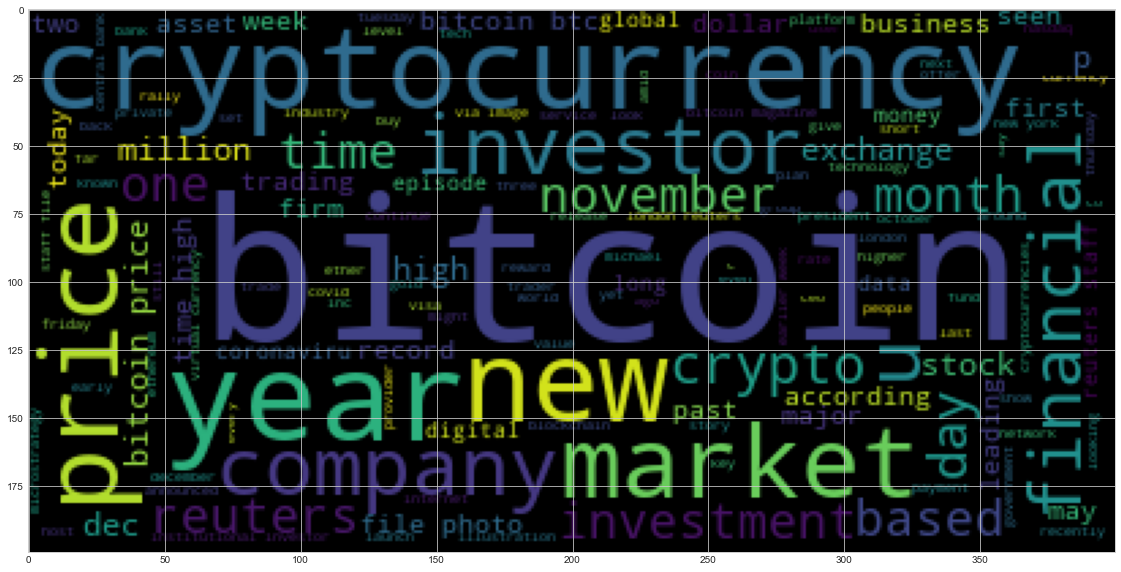

In [254]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(' '.join(bitcoin_token_list))
plt.imshow(btc_wc)

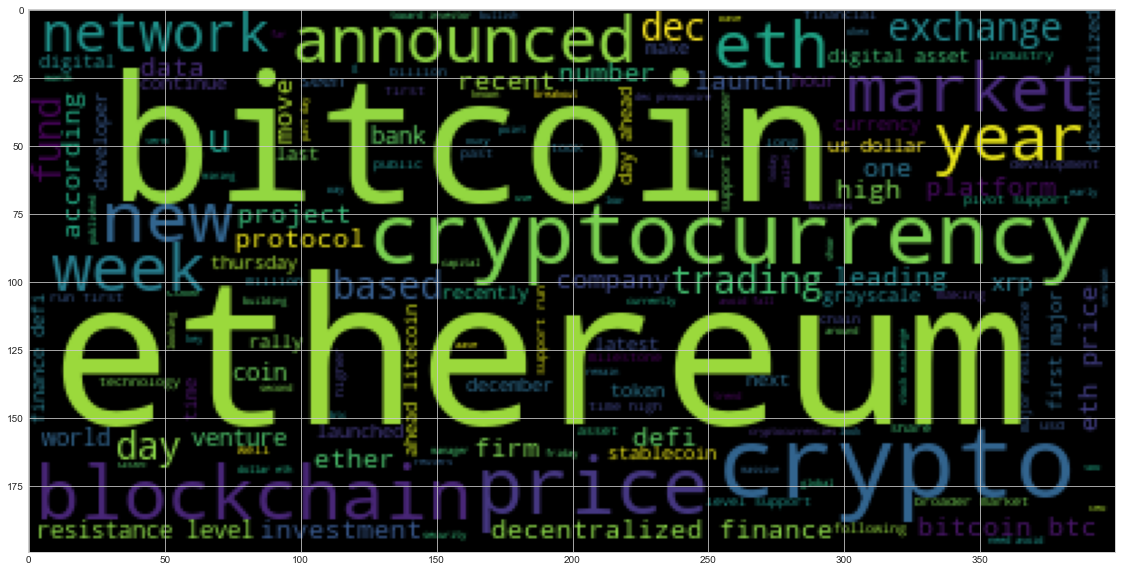

In [256]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(' '.join(ethereum_token_list))
plt.imshow(eth_wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [257]:
import spacy
from spacy import displacy

In [258]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


You should consider upgrading via the 'C:\Users\mathl\anaconda3\envs\dev\python.exe -m pip install --upgrade pip' command.


In [259]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [266]:
# Concatenate all of the bitcoin text together
bitcoin_all_content = ' '.join(bitcoin_sentiment_df['text'].tolist())

In [271]:
# Run the NER processor on all of the text
bitcoin_NER = nlp(bitcoin_all_content)

# Add a title to the document
bitcoin_NER_title = "Bitcoin NER"

In [272]:
# Render the visualization
print(bitcoin_NER_title)
displacy.render(bitcoin_NER, style='ent')

Bitcoin NER


In [273]:
# List all Entities
for ent in bitcoin_NER.ents:
    print(ent.text, ent.label_)

Grayson Blackmon / PERSON
the year DATE
the day DATE
Twitter ORG
December DATE
15 DATE
2020 DATE
6 min QUANTITY
A few days ago DATE
US GPE
Cynthia Lummis PERSON
Bitcoin GPE
Reuters ORG
the first day DATE
LONDON GPE
Dec 15 DATE
Reuters ORG
Japanese NORP
SBI Holdings Inc ORG
UK GPE
B2C2 GPE
first ORDINAL
LONDON GPE
Reuters ORG
Japanese NORP
SBI Holdings Inc ORG
UK GPE
B2C2 GPE
first ORDINAL
Last week DATE
Visa ORG
Mastercard ORG
Pornhub PERSON
WILMINGTON FAC
DELAWARE GPE
DECEMBER 14 DATE
U.S. GPE
Joe Biden PERSON
The Queen FAC
December 14, 2020 DATE
Wilmington GPE
Delaw PERSON
the spring DATE
500 CARDINAL
14% PERCENT
2020 DATE
NASDAQ Co LAW
Getty ORG
10 CARDINAL
The United States GPE
Desperat PERSON
Bitcoin GPE
Ripple PERSON
two CARDINAL
up to Christmas DATE
+3197 ORG
Bitcoin GPE
Bitcoin GPE
Banca Generali PERSON
MIB ORG
Milan GPE
Alexander Pohl PERSON
Getty Images PERSON
NurPhoto ORG
Banca Generali PERSON
Bitcoin GPE
RSK ORG
DeFi ORG
Bitcoins ORG
Bitcoi WORK_OF_ART
today DATE
Bitcoin Ma

---

## Ethereum NER

In [274]:
# Concatenate all of the bitcoin text together
ethereum_all_content = ' '.join(ethereum_sentiment_df['text'].tolist())

In [276]:
# Run the NER processor on all of the text
ethereum_NER = nlp(ethereum_all_content)

# Add a title to the document
ethereum_NER_title = "Ethereum NER"

In [277]:
# Render the visualization
print(ethereum_NER_title)
displacy.render(ethereum_NER, style='ent')

Ethereum NER


In [278]:
# List all Entities
for ent in ethereum_NER.ents:
    print(ent.text, ent.label_)

December DATE
15 DATE
2020 DATE
6 min QUANTITY
A few days ago DATE
US GPE
Cynthia Lummis PERSON
Bitcoin GPE
Ethereum 2.0 FAC
Barack Obama PERSON
the White House FAC
Digital ORG
Grayscale Investments ORG
$13 billion MONEY
Dec. 14 DATE
first ORDINAL
The Secret Network ORG
Ethereum bridge FAC
the Secret Network ORG
RSK ORG
DeFi ORG
Bitcoins ORG
Bitcoi WORK_OF_ART
Cryptocurrency NORP
recent years DATE
Bitcoin GPE
Litecoin GPE
the day ahead DATE
Litecoin PERSON
$81.50 MONEY
first ORDINAL
83.85 MONEY
Bitcoin GPE
BTC ORG
DeFi PERSON
Uniswap ORG
$50 billion MONEY
Dec. 15 DATE
Hayden Adams PERSON
three CARDINAL
Collider Ventures ORG
Israels NORP
2020 DATE
FTX ORG
more than 100,000 CARDINAL
BTC ORG
Argentina GPE
South America LOC
Nervos ORG
Cardano GPE
ul><li PERSON
0.04 MONEY
0.03 MONEY
Status ORG
BTC ORG
Sovryn NORP
above $580 MONEY
US GPE
595 MONEY
600 MONEY
ul><li PERSON
Leverj PERSON
Tuesday DATE
XRP ORG
Bitcoins ORG
XRP ORG
Bitcoin GPE
December DATE
20,000 MONEY
Vitalik Buterin PERSON
Twit